In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.signal import spectrogram
from matplotlib.ticker import FuncFormatter
from scipy.stats import mode
import math

## This notebook plots and analyses the data recorded on a firth road test done with the soundcard. The car was driving at 40km/h and 20km/h and the sampling rate was 44.1khz

# 40Km/h V1

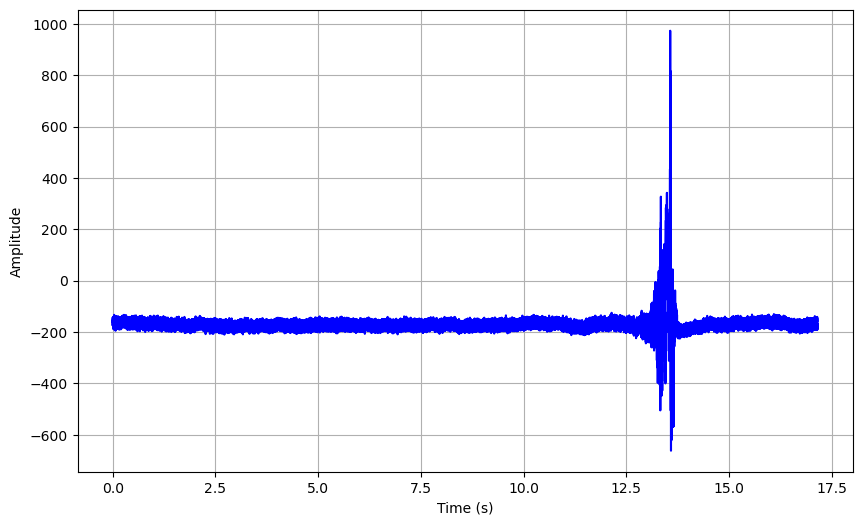

In [12]:
# Replace 'your_wav_file.wav' with the path to your WAV file
wav_file = '40kmV1.wav'

# Read the WAV file
sample_rate, audio_data = wavfile.read(wav_file)

# Calculate the time values for the x-axis
time = np.arange(0, len(audio_data)) / sample_rate

# Plot the voltage-time graph
plt.figure(figsize=(10, 6))
plt.plot(time, audio_data, color='b')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
#plt.title('Voltage-Time Plot')
plt.grid(True)
plt.savefig('SoundblasterTimeDomain.pdf', format = 'pdf')
plt.show()


## Plotting Spectrogram of this data

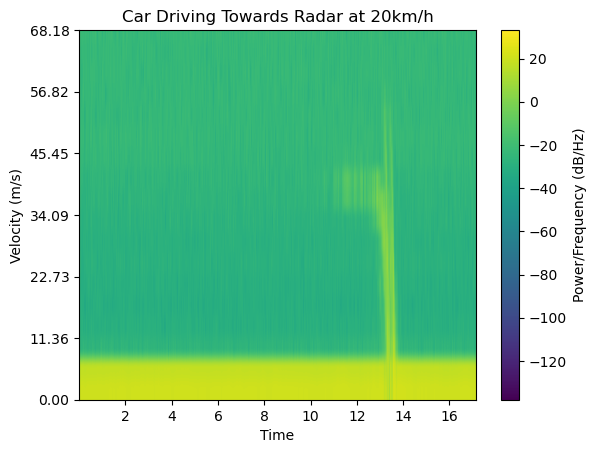

In [4]:
# Sample data
samplingFrequency = sample_rate

# Plot the spectrogram
powerSpectrum, frequenciesFound, time, imageAxis = plt.specgram(audio_data, Fs=samplingFrequency)

# Define the scaling factor
scaling_factor = 1 / 44

# Define a custom y-axis formatter function
def custom_formatter(x, pos):
    # Scale the y-axis labels by dividing by the scaling factor
    scaled_value = x * scaling_factor
    return f'{scaled_value:.2f}'  # Format the label with two decimal places

# Create a custom y-axis formatter
formatter = FuncFormatter(custom_formatter)

# Apply the custom formatter to the y-axis
plt.gca().yaxis.set_major_formatter(formatter)

colorbar = plt.colorbar(imageAxis, label = 'Power/Frequency (dB/Hz)')
plt.ylim(0, 3000)
plt.xlabel('Time')
plt.ylabel('Velocity (m/s)')
plt.title('Car Driving Towards Radar at 20km/h')

plt.show()


## Changing parameters of spectrogram to improve clarity

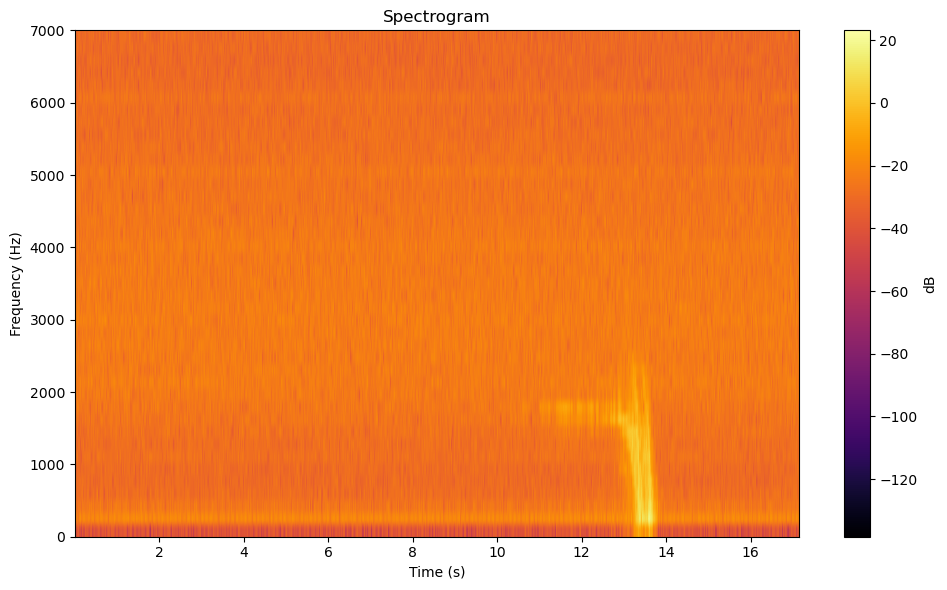

In [5]:
# Load the WAV file
filename = '40kmV1.wav'  # Replace with your WAV file's path
sample_rate, audio_data = wavfile.read(filename)

# Create a spectrogram
frequencies, times, Sxx = spectrogram(audio_data, fs=sample_rate)

# Plot the spectrogram with correct frequency values
plt.figure(figsize=(10, 6))
plt.imshow(10 * np.log10(Sxx), aspect='auto', cmap='inferno', origin='lower',
           extent=[times.min(), times.max(), frequencies.min(), frequencies.max()])
plt.colorbar(label='dB')
plt.ylim(0,7000)
plt.title('Spectrogram')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.tight_layout()
plt.show()

## Adding sxx_smoothed as well as increasing nperseg 

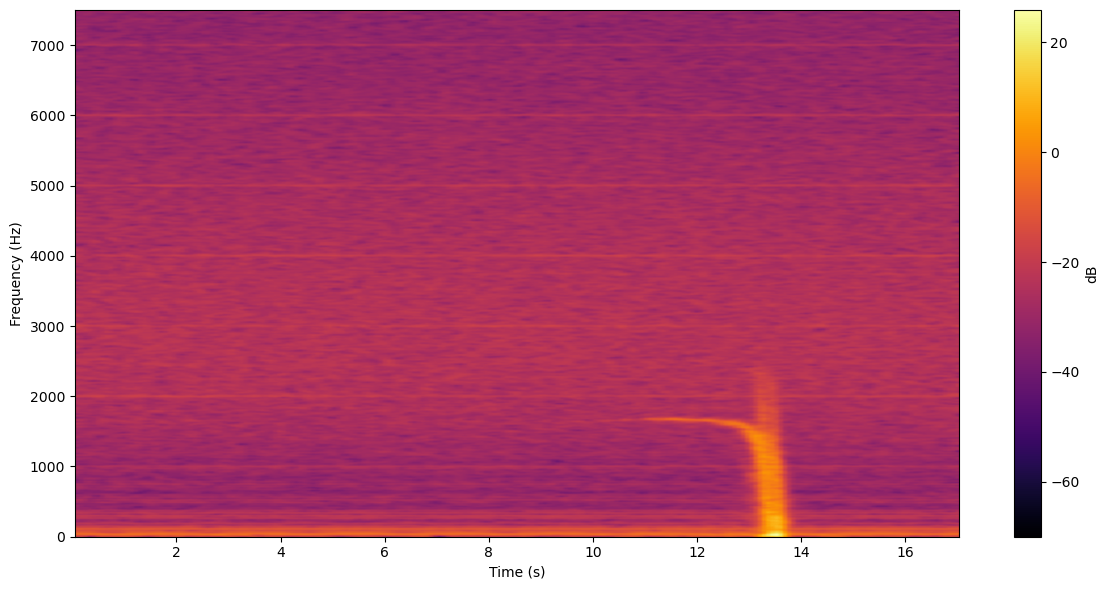

In [6]:
# Load the WAV file
filename = '40kmV1.wav'  # Replace with your WAV file's path
sample_rate, audio_data = wavfile.read(filename)

# Create a spectrogram
frequencies, times, Sxx = spectrogram(audio_data, fs=sample_rate, nperseg=4096, noverlap=512)

# Apply Gaussian smoothing
from scipy.ndimage import gaussian_filter
Sxx_smoothed = gaussian_filter(10 * np.log10(Sxx), sigma=(1, 1))

# Plot the spectrogram with improvements
plt.figure(figsize=(12, 6))
plt.imshow(Sxx_smoothed, aspect='auto', cmap='inferno', origin='lower',
           extent=[times.min(), times.max(), frequencies.min(), frequencies.max()])
plt.ylim(0,7500)
plt.colorbar(label='dB')
#plt.title('Spectrogram')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.tight_layout()
plt.savefig('SoundblasterSpectrogram.pdf', format = 'pdf')
plt.show()

# Applying thresholding to the above spectrogram

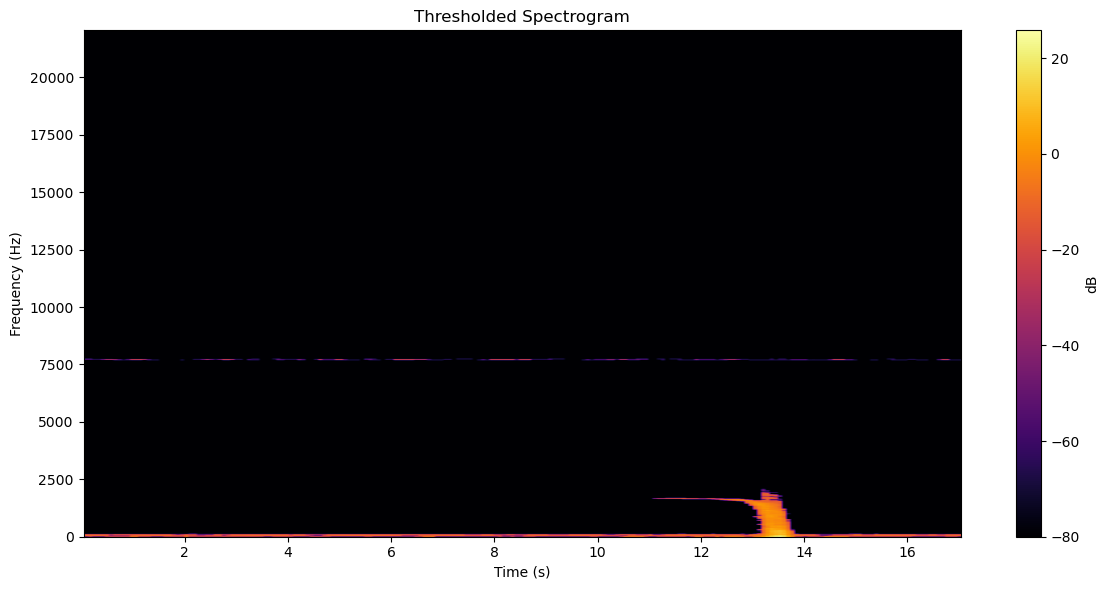

In [7]:
# Load the WAV file
filename = '40kmV1.wav'  # Replace with your WAV file's path
sample_rate, audio_data = wavfile.read(filename)

# Create a spectrogram
frequencies, times, Sxx = spectrogram(audio_data, fs=sample_rate, nperseg=4096, noverlap=512)

# Apply Gaussian smoothing
Sxx_smoothed = gaussian_filter(10 * np.log10(Sxx), sigma=(1, 1))

# Apply thresholding
threshold_db = -15  # Threshold in dB
min_db = -80  # Minimum value for frequencies below the threshold
Sxx_thresholded = np.where(Sxx_smoothed >= threshold_db, Sxx_smoothed, min_db)

# Plot the thresholded spectrogram
plt.figure(figsize=(12, 6))
plt.imshow(Sxx_thresholded, aspect='auto', cmap='inferno', origin='lower',
           extent=[times.min(), times.max(), frequencies.min(), frequencies.max()])
plt.colorbar(label='dB')
plt.title('Thresholded Spectrogram')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.tight_layout()
plt.show()

# Removing DC Shift then Plotting Spectrogram

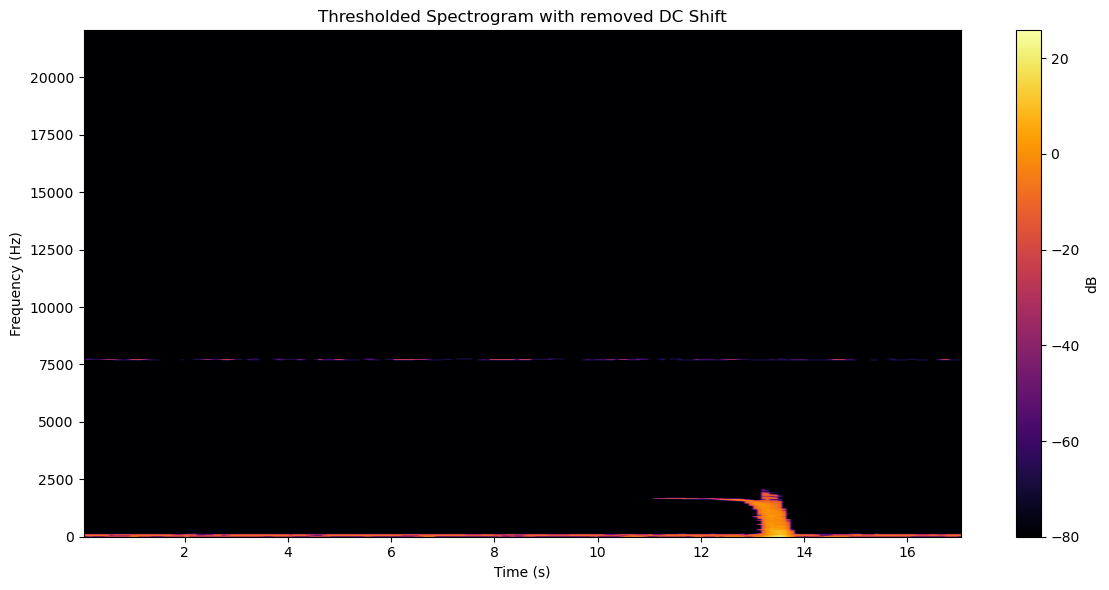

In [8]:
# Load the WAV file
filename = '40kmV1.wav'  # Replace with your WAV file's path
sample_rate, audio_data = wavfile.read(filename)

# Remove the DC component (mean) from the audio data
audio_data = audio_data - np.mean(audio_data)

# Create a spectrogram
frequencies, times, Sxx = spectrogram(audio_data, fs=sample_rate, nperseg=4096, noverlap=512)

# Apply Gaussian smoothing
Sxx_smoothed = gaussian_filter(10 * np.log10(Sxx), sigma=(1, 1))

# Apply thresholding
threshold_db = -15  # Threshold in dB
min_db = -80  # Minimum value for frequencies below the threshold
Sxx_thresholded = np.where(Sxx_smoothed >= threshold_db, Sxx_smoothed, min_db)

# Plot the thresholded spectrogram
plt.figure(figsize=(12, 6))
plt.imshow(Sxx_thresholded, aspect='auto', cmap='inferno', origin='lower',
           extent=[times.min(), times.max(), frequencies.min(), frequencies.max()])
plt.colorbar(label='dB')
plt.title('Thresholded Spectrogram with removed DC Shift')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.tight_layout()
plt.show()




# Now finding the mode frequency (equal to or above -15dB) between 100hz and 7500hz

Speed of Car: 42.03km/h


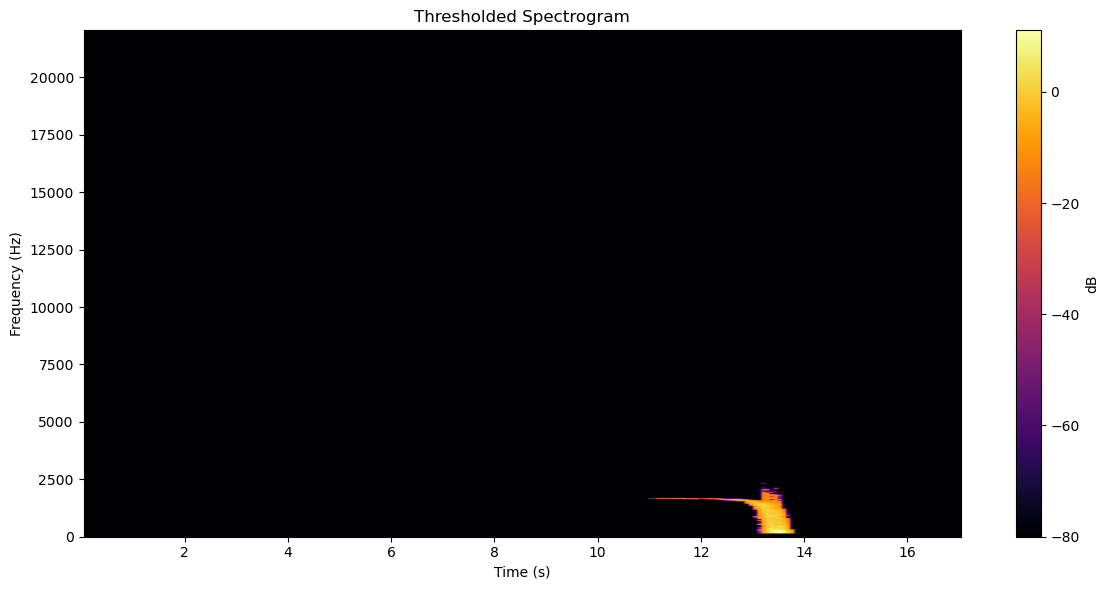

In [9]:
# Load the WAV file
filename = '40kmV1.wav'  # Replace with your WAV file's path
sample_rate, audio_data = wavfile.read(filename)

# Remove the DC component (mean) from the audio data
audio_data = audio_data - np.mean(audio_data)

# Create a spectrogram
frequencies, times, Sxx = spectrogram(audio_data, fs=sample_rate, nperseg=4096, noverlap=512)

# Apply Gaussian smoothing
Sxx_smoothed = gaussian_filter(10 * np.log10(Sxx), sigma=(1, 1))

# Apply thresholding
threshold_db = -16  # Threshold in dB
min_db = -80  # Minimum value for frequencies below the threshold
Sxx_thresholded = np.where(Sxx_smoothed >= threshold_db, Sxx_smoothed, min_db)

# Exclude frequencies below 50 Hz (lowered from 150 Hz)
min_frequency = 150  # Hz
max_frequency = 7000
frequency_mask = (frequencies >= min_frequency) & (frequencies <= max_frequency)
Sxx_thresholded[~frequency_mask, :] = min_db

# Find the most common frequency with magnitude above -16 dB
power_above_threshold = Sxx_thresholded > threshold_db
power_above_threshold = power_above_threshold.astype(int)

# Calculate the sum of power above threshold for each frequency
power_sum = np.sum(power_above_threshold, axis=1)

# Find the frequency with the highest power sum
mode_frequency_index = np.argmax(power_sum)

# Get the frequency value corresponding to the mode index
mode_frequency = frequencies[mode_frequency_index]

# Plot the thresholded spectrogram
plt.figure(figsize=(12, 6))
plt.imshow(Sxx_thresholded, aspect='auto', cmap='inferno', origin='lower',
           extent=[times.min(), times.max(), frequencies.min(), frequencies.max()])
plt.colorbar(label='dB')
plt.title('Thresholded Spectrogram')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')

# Print the mode frequency
print(f'Speed of Car: {mode_frequency/44.68/np.cos(20*np.pi/180)/np.cos(20*np.pi/180):.2f}km/h')
plt.tight_layout()
plt.show()


# 40km/h V2

Speed of Car: 42.30km/h


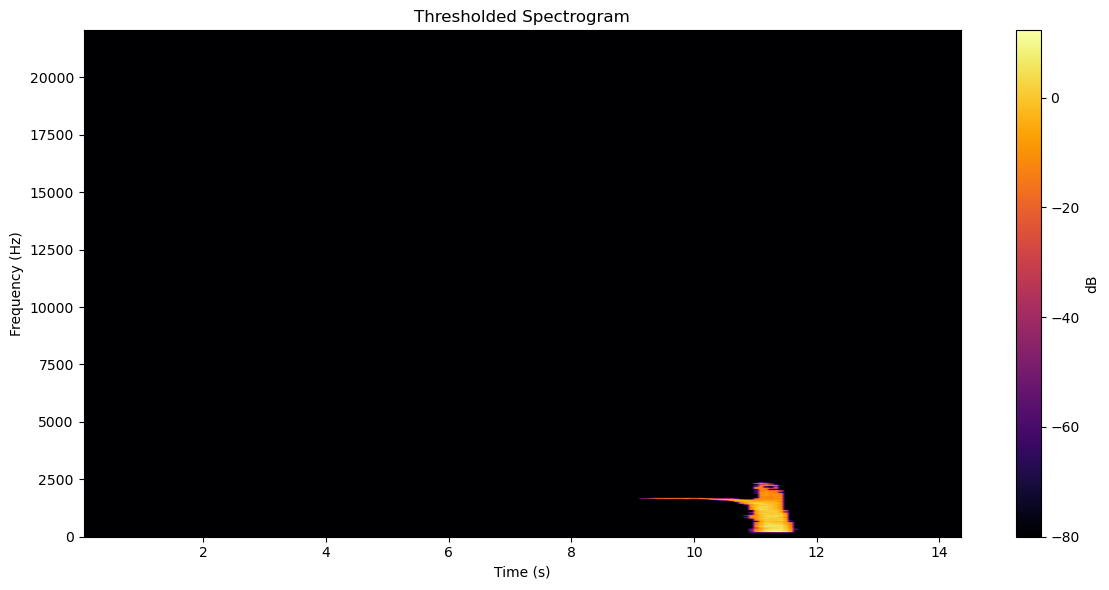

In [10]:
# Load the WAV file
filename = '40kmV2.wav'  # Replace with your WAV file's path
sample_rate, audio_data = wavfile.read(filename)

# Remove the DC component (mean) from the audio data
audio_data = audio_data - np.mean(audio_data)

# Create a spectrogram
frequencies, times, Sxx = spectrogram(audio_data, fs=sample_rate, nperseg=4096, noverlap=512)

# Apply Gaussian smoothing
Sxx_smoothed = gaussian_filter(10 * np.log10(Sxx), sigma=(1, 1))

# Apply thresholding
threshold_db = -16  # Threshold in dB
min_db = -80  # Minimum value for frequencies below the threshold
Sxx_thresholded = np.where(Sxx_smoothed >= threshold_db, Sxx_smoothed, min_db)

# Exclude frequencies below 50 Hz (lowered from 150 Hz)
min_frequency = 200  # Hz
max_frequency = 7000
frequency_mask = (frequencies >= min_frequency) & (frequencies <= max_frequency)
Sxx_thresholded[~frequency_mask, :] = min_db

# Find the most common frequency with magnitude above -16 dB
power_above_threshold = Sxx_thresholded > threshold_db
power_above_threshold = power_above_threshold.astype(int)

# Calculate the sum of power above threshold for each frequency
power_sum = np.sum(power_above_threshold, axis=1)

# Find the frequency with the highest power sum
mode_frequency_index = np.argmax(power_sum)

# Get the frequency value corresponding to the mode index
mode_frequency = frequencies[mode_frequency_index]

# Plot the thresholded spectrogram
plt.figure(figsize=(12, 6))
plt.imshow(Sxx_thresholded, aspect='auto', cmap='inferno', origin='lower',
           extent=[times.min(), times.max(), frequencies.min(), frequencies.max()])
plt.colorbar(label='dB')
plt.title('Thresholded Spectrogram')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')

# Print the mode frequency
print(f'Speed of Car: {mode_frequency/44.68/np.cos(20*np.pi/180)/np.cos(20*np.pi/180):.2f}km/h')
plt.tight_layout()
plt.show()


# 20km/h V1

Speed of Car: 20.47km/h


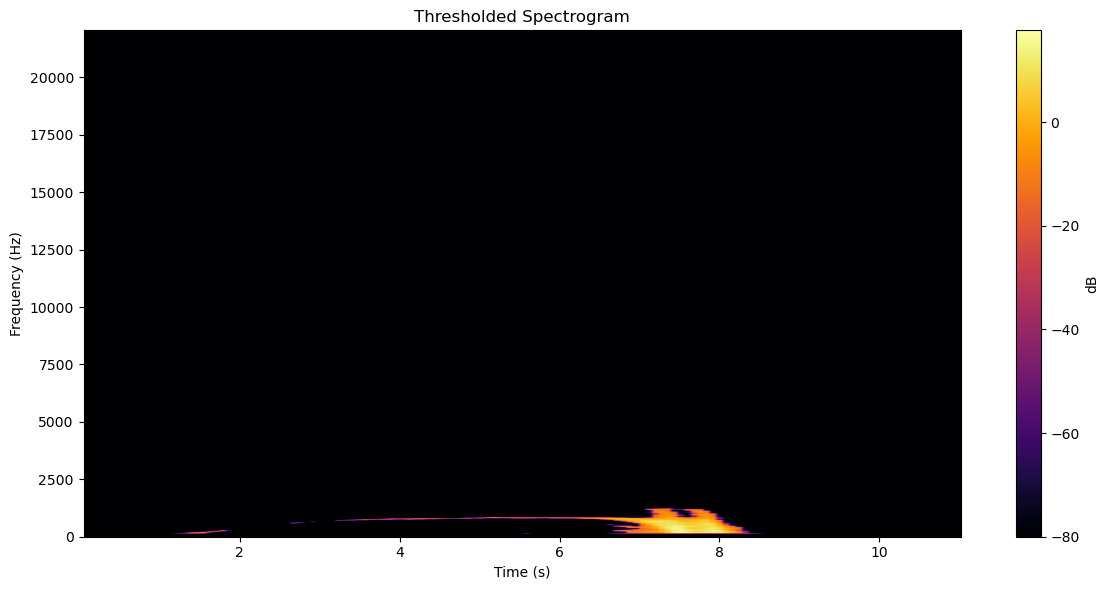

In [11]:
# Load the WAV file
filename = '20kmV1.wav'  # Replace with your WAV file's path
sample_rate, audio_data = wavfile.read(filename)

# Remove the DC component (mean) from the audio data
audio_data = audio_data - np.mean(audio_data)

# Create a spectrogram
frequencies, times, Sxx = spectrogram(audio_data, fs=sample_rate, nperseg=4096, noverlap=512)

# Apply Gaussian smoothing
Sxx_smoothed = gaussian_filter(10 * np.log10(Sxx), sigma=(1, 1))

# Apply thresholding
threshold_db = -16  # Threshold in dB
min_db = -80  # Minimum value for frequencies below the threshold
Sxx_thresholded = np.where(Sxx_smoothed >= threshold_db, Sxx_smoothed, min_db)

# Exclude frequencies below 50 Hz (lowered from 150 Hz)
min_frequency = 150  # Hz
max_frequency = 7000
frequency_mask = (frequencies >= min_frequency) & (frequencies <= max_frequency)
Sxx_thresholded[~frequency_mask, :] = min_db

# Find the most common frequency with magnitude above -16 dB
power_above_threshold = Sxx_thresholded > threshold_db
power_above_threshold = power_above_threshold.astype(int)

# Calculate the sum of power above threshold for each frequency
power_sum = np.sum(power_above_threshold, axis=1)

# Find the frequency with the highest power sum
mode_frequency_index = np.argmax(power_sum)

# Get the frequency value corresponding to the mode index
mode_frequency = frequencies[mode_frequency_index]

# Plot the thresholded spectrogram
plt.figure(figsize=(12, 6))
plt.imshow(Sxx_thresholded, aspect='auto', cmap='inferno', origin='lower',
           extent=[times.min(), times.max(), frequencies.min(), frequencies.max()])
plt.colorbar(label='dB')
plt.title('Thresholded Spectrogram')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')

# Print the mode frequency
print(f'Speed of Car: {mode_frequency/44.68/np.cos(20*np.pi/180)/np.cos(20*np.pi/180):.2f}km/h')
plt.tight_layout()
plt.show()
